# Exercise 1 Functional API of Keras
Architecture inspired by exercise 8

## Sequential model exercise 8

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras import regularizers
from tensorflow.keras import utils

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

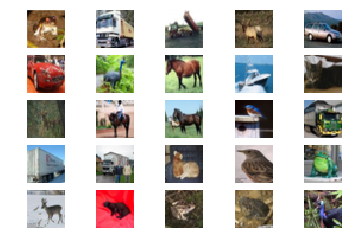

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    
    #prepare print of 25 images
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Cifar still holds 10 classes (from Dog to Aircraft)

show_imgs(X_train)     # get the 25 images (which were previously prepared) from Xtrain
print(X_train.shape)
print(X_test.shape)

In [4]:
#Values need to be normalized in range 0 to 1 
X_train =  X_train.astype('float32')       # change the type towards float32  (from integer)
X_test =   X_test.astype('float32')        # same for test set
X_train = X_train / 255.0                   #normalize the range to be between 0.0 and 1.0 (255 = max value)
X_test =  X_test / 255.0                    # same for xtest
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [5]:
n_classes = 10
#use util function from keras
Y_train = utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
modelSeq = Sequential()     #define Sequential model
modelSeq.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
modelSeq.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelSeq.add(MaxPooling2D((2, 2)))
modelSeq.add(Dropout(0.2))
modelSeq.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelSeq.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelSeq.add(MaxPooling2D((2, 2)))
modelSeq.add(Dropout(0.2))
modelSeq.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelSeq.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelSeq.add(MaxPooling2D((2, 2)))
modelSeq.add(Dropout(0.2))
modelSeq.add(Flatten())
modelSeq.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelSeq.add(Dropout(0.2))
modelSeq.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))

# ... print model infomration with summary() method 
modelSeq.summary()
modelSeq.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historySeq = modelSeq.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

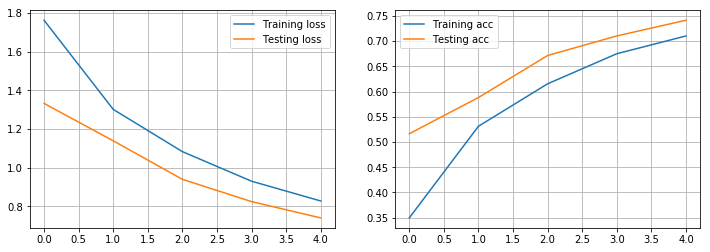

In [7]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historySeq.history['loss'], label='Training loss')
ax1.plot(historySeq.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historySeq.history['accuracy'], label='Training acc')
ax2.plot(historySeq.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [8]:
loss_test, metric_test = modelSeq.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Sequential model: Test loss:', loss_test)
print('Sequential model: Test accuracy:', metric_test)

Sequential model: Test loss: 0.7405284461975098
Sequential model: Test accuracy: 0.7413


In [9]:
#from tensorflow.keras.utils import plot_model

#plot_model(modelSeq)

## Functional Model

In [10]:

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Functional type
visible = Input(shape=(32,32,3))
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)
drop1 = Dropout(0.2)(pool1)
conv3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop1)
conv4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)
drop2 = Dropout(0.2)(pool2)
conv5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop2)
conv6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)
drop3 = Dropout(0.2)(pool3)
flat1 = Flatten()(drop3)
hidden1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
drop4 = Dropout(0.2)(hidden1)
output = Dense(n_classes, input_shape=(1,8192), activation = 'softmax')(drop4)

modelFunc = Model(inputs=visible, outputs=output)

modelFunc.summary()

modelFunc.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historyFunc = modelFunc.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928 

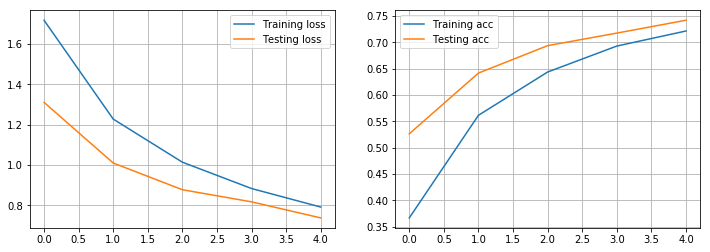

In [11]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historyFunc.history['loss'], label='Training loss')
ax1.plot(historyFunc.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historyFunc.history['accuracy'], label='Training acc')
ax2.plot(historyFunc.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [12]:
loss_test, metric_test = modelFunc.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Functional model: Test loss:', loss_test)
print('Functional model: Test accuracy:', metric_test)

Functional model: Test loss: 0.7384335486412048
Functional model: Test accuracy: 0.7419


In [13]:
#plot_model(modelFunc)

| Model | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  Sequential | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7201  | 0.7499 |
|  Functional | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7077  | 0.7153 |


In [14]:
# Exercise 1 b)
# Multiple Paths

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Functional type
visible = Input(shape=(32,32,3))

# Path 1
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)
drop1 = Dropout(0.2)(pool1)
conv3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop1)
conv4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)
drop2 = Dropout(0.2)(pool2)
conv5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop2)
conv6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)
drop3 = Dropout(0.2)(pool3)
flat1 = Flatten()(drop3)

# Path 2
conv21 = Conv2D(32, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv22 = Conv2D(32, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv21)
pool21 = MaxPooling2D((2, 2))(conv22)
drop21 = Dropout(0.2)(pool21)
conv23 = Conv2D(64, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(drop21)
conv24 = Conv2D(64, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv23)
pool22 = MaxPooling2D((2, 2))(conv24)
drop22 = Dropout(0.2)(pool22)
conv25 = Conv2D(128, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(drop22)
conv26 = Conv2D(128, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv25)
pool23 = MaxPooling2D((2, 2))(conv26)
drop23 = Dropout(0.2)(pool23)
flat21 = Flatten()(drop23)

merge1 = concatenate([flat1, flat21])

hidden1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(merge1)
drop4 = Dropout(0.2)(hidden1)
output = Dense(n_classes, input_shape=(1,8192), activation = 'softmax')(drop4)

modelFuncPath = Model(inputs=visible, outputs=output)

modelFuncPath.summary()

modelFuncPath.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historyFuncPath = modelFuncPath.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 32, 32, 32)   3488        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_12[0][0]                  
____________________________________________________________________________________________

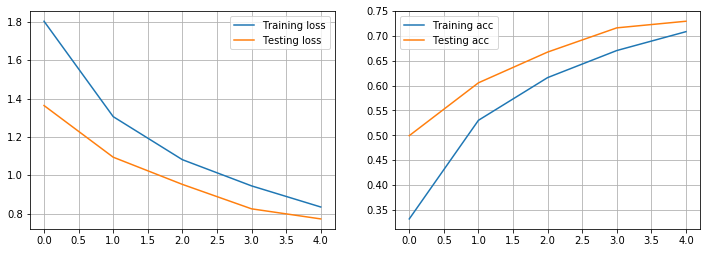

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historyFuncPath.history['loss'], label='Training loss')
ax1.plot(historyFuncPath.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historyFuncPath.history['accuracy'], label='Training acc')
ax2.plot(historyFuncPath.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [16]:
loss_test, metric_test = modelFuncPath.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Functional model, multiple paths: Test loss:', loss_test)
print('Functional model, multiple paths: Test accuracy:', metric_test)

Functional model, multiple paths: Test loss: 0.7722079916000366
Functional model, multiple paths: Test accuracy: 0.7293


In [17]:
#plot_model(modelFuncPath)

In [18]:
# Exercise 1 b)
# Multiple features

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Functional type
visible = Input(shape=(32,32,3))
# feature 1 extractor
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)
drop1 = Dropout(0.2)(pool1)

flat1 = Flatten()(drop1)

conv3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop1)
conv4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)
drop2 = Dropout(0.2)(pool2)

flat2 = Flatten()(drop2)

conv5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop2)
conv6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)
drop3 = Dropout(0.2)(pool3)

flat3 = Flatten()(drop3)

merge1 = concatenate([flat1, flat2, flat3])

hidden1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
drop4 = Dropout(0.2)(hidden1)
output = Dense(n_classes, input_shape=(1,8192), activation = 'softmax')(drop4)

modelFuncFeat = Model(inputs=visible, outputs=output)

modelFuncFeat.summary()

modelFuncFeat.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historyFuncFeat = modelFuncFeat.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048

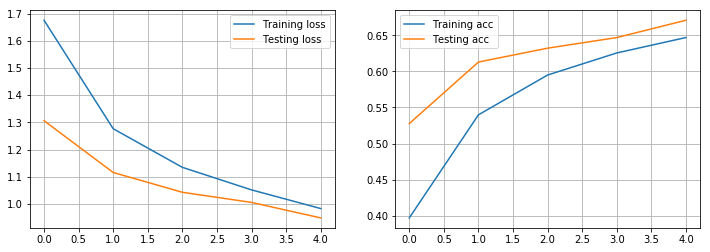

In [19]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historyFuncFeat.history['loss'], label='Training loss')
ax1.plot(historyFuncFeat.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historyFuncFeat.history['accuracy'], label='Training acc')
ax2.plot(historyFuncFeat.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [20]:
loss_test, metric_test = modelFuncFeat.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Functional model, multiple features: Test loss:', loss_test)
print('Functional model, multiple features: Test accuracy:', metric_test)

Functional model, multiple features: Test loss: 0.9484885681152344
Functional model, multiple features: Test accuracy: 0.6708


In [21]:
#plot_model(modelFuncFeat)

| Model | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  Sequential | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7201  | 0.7499 |
|  Functional | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7077  | 0.7153 |
|  Functional multiple paths | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7083  | 0.7293 |
|  Functional multiple features | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.6469  | 0.6708 |

In [8]:
# Exercise 1 b)
# Multiple Paths

E = 30                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Functional type
visible = Input(shape=(32,32,3))

# Path 1
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)
drop1 = Dropout(0.2)(pool1)
conv3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop1)
conv4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)
drop2 = Dropout(0.2)(pool2)
conv5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop2)
conv6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)
drop3 = Dropout(0.2)(pool3)
flat1 = Flatten()(drop3)

# Path 2
conv21 = Conv2D(32, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv22 = Conv2D(32, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv21)
pool21 = MaxPooling2D((2, 2))(conv22)
drop21 = Dropout(0.2)(pool21)
conv23 = Conv2D(64, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(drop21)
conv24 = Conv2D(64, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv23)
pool22 = MaxPooling2D((2, 2))(conv24)
drop22 = Dropout(0.2)(pool22)
conv25 = Conv2D(128, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(drop22)
conv26 = Conv2D(128, kernel_size=6, activation='relu', kernel_initializer='he_uniform', padding='same')(conv25)
pool23 = MaxPooling2D((2, 2))(conv26)
drop23 = Dropout(0.2)(pool23)
flat21 = Flatten()(drop23)

merge1 = concatenate([flat1, flat21])

hidden1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(merge1)
drop4 = Dropout(0.2)(hidden1)
output = Dense(n_classes, input_shape=(1,8192), activation = 'softmax')(drop4)

modelFuncPathEpoch = Model(inputs=visible, outputs=output)

modelFuncPathEpoch.summary()

checkpointPathEpoch = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, 
                             monitor='val_acc',save_best_only=True, 
                             mode='auto')

modelFuncPathEpoch.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historyFuncPathEpoch = modelFuncPathEpoch.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test), callbacks=[checkpointPathEpoch])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 32)   3488        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   9248        conv2d[0][0]                     
______________________________________________________________________________________________

50000/50000 [==============================] - 652s 13ms/sample - loss: 0.8349 - accuracy: 0.7074 - val_loss: 0.7859 - val_accuracy: 0.7263
Epoch 6/30
50000/50000 [==============================] - 663s 13ms/sample - loss: 0.7597 - accuracy: 0.7343 - val_loss: 0.7292 - val_accuracy: 0.7510
Epoch 7/30
50000/50000 [==============================] - 576s 12ms/sample - loss: 0.6987 - accuracy: 0.7561 - val_loss: 0.6693 - val_accuracy: 0.7699
Epoch 8/30
50000/50000 [==============================] - 570s 11ms/sample - loss: 0.6437 - accuracy: 0.7772 - val_loss: 0.6394 - val_accuracy: 0.7876
Epoch 9/30
50000/50000 [==============================] - 569s 11ms/sample - loss: 0.6077 - accuracy: 0.7865 - val_loss: 0.6686 - val_accuracy: 0.7740
Epoch 10/30
50000/50000 [==============================] - 570s 11ms/sample - loss: 0.5757 - accuracy: 0.7986 - val_loss: 0.6379 - val_accuracy: 0.7894
Epoch 11/30
50000/50000 [==============================] - 571s 11ms/sample - loss: 0.5314 - accuracy: 0

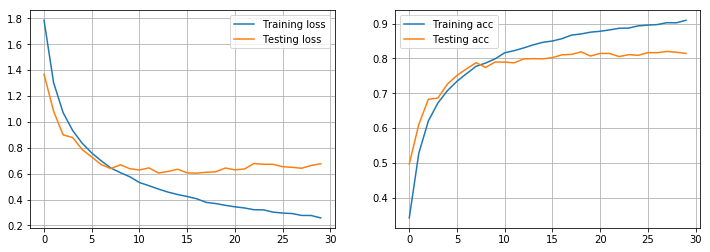

In [9]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historyFuncPathEpoch.history['loss'], label='Training loss')
ax1.plot(historyFuncPathEpoch.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historyFuncPathEpoch.history['accuracy'], label='Training acc')
ax2.plot(historyFuncPathEpoch.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [11]:
loss_test, metric_test = modelFuncPathEpoch.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Functional model, multiple Paths, 30 Epochs: Test loss:', loss_test)
print('Functional model, multiple Paths, 30 Epochs: Test accuracy:', metric_test)

Functional model, multiple Paths, 30 Epochs: Test loss: 0.6766730097651482
Functional model, multiple Paths, 30 Epochs: Test accuracy: 0.8143


In [12]:
#plot_model(modelFuncPathEpoch)

In [14]:
# Exercise 1 b)
# Best?

# Exercise 1 b)
# Multiple features

E = 30                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Functional type
visible = Input(shape=(32,32,3))
# feature 1 extractor
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(visible)
conv2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)
drop1 = Dropout(0.2)(pool1)

flat1 = Flatten()(drop1)

conv3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop1)
conv4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)
drop2 = Dropout(0.2)(pool2)

flat2 = Flatten()(drop2)

conv5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(drop2)
conv6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)
drop3 = Dropout(0.2)(pool3)

flat3 = Flatten()(drop3)

merge1 = concatenate([flat1, flat2, flat3])

hidden1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
drop4 = Dropout(0.2)(hidden1)
output = Dense(n_classes, input_shape=(1,8192), activation = 'softmax')(drop4)

modelFuncFeatEpoch = Model(inputs=visible, outputs=output)

modelFuncFeatEpoch.summary()

checkpointFeatureEpoch = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, 
                             monitor='val_acc',save_best_only=True, 
                             mode='auto')

modelFuncFeatEpoch.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
historyFuncFeatEpoch = modelFuncFeatEpoch.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test), callbacks=[checkpointFeatureEpoch])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048

Epoch 22/30
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.2813 - accuracy: 0.8979 - val_loss: 1.2004 - val_accuracy: 0.6910
Epoch 23/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.2739 - accuracy: 0.9005 - val_loss: 1.1939 - val_accuracy: 0.6875
Epoch 24/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.2676 - accuracy: 0.9034 - val_loss: 1.2632 - val_accuracy: 0.6869
Epoch 25/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.2517 - accuracy: 0.9092 - val_loss: 1.2258 - val_accuracy: 0.6827
Epoch 26/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.2491 - accuracy: 0.9102 - val_loss: 1.2628 - val_accuracy: 0.6899
Epoch 27/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.2363 - accuracy: 0.9145 - val_loss: 1.2870 - val_accuracy: 0.6839
Epoch 28/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.2358 - accuracy:

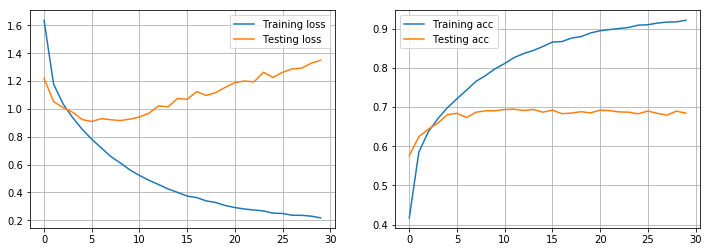

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(historyFuncFeatEpoch.history['loss'], label='Training loss')
ax1.plot(historyFuncFeatEpoch.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(historyFuncFeatEpoch.history['accuracy'], label='Training acc')
ax2.plot(historyFuncFeatEpoch.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [16]:
loss_test, metric_test = modelFuncFeatEpoch.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Functional model, multiple features, 30 Epochs: Test loss:', loss_test)
print('Functional model, multiple features, 30 Epochs: Test accuracy:', metric_test)

Functional model, multiple features, 30 Epochs: Test loss: 1.3490508230686187
Functional model, multiple features, 30 Epochs: Test accuracy: 0.6843


In [ ]:
#plot_model(modelFuncFeatEpoch)

| Model | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  Sequential | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7201  | 0.7499 |
|  Functional | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7077  | 0.7153 |
|  Functional multiple paths | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.7083  | 0.7293 |
|  Functional multiple features | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.6469  | 0.6708 |
|  Functional multiple paths, 30 Epochs | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.9094  | 0.8143 |
|  Functional multiple features, 30 Epochs | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.9217  | 0.6843 |
|  Sequential, 30 Epochs | CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-CONV(32F,same)-RELU-POOL-DROP-FLATTEN-DENSE-DROP-DENSE | 0.9013  | 0.8298 |

- The Sequential model with 30 Epochs leads to the best result (0.8298 accuracy).
- The best functional model is with mutiple paths and 30 epochs.
- The functional model with multiple features and 30 epochs shows overfitting.